In [1]:
import pandas as pd
import numpy as np

In [2]:
consumer_df = pd.read_csv('consumer_data.csv')
data_df = pd.read_csv('simulated_data.csv')

In [3]:

consumer_df = consumer_df.rename(columns={"User ID": "user_id"})


In [4]:
merged_df = pd.merge(consumer_df, data_df, on = 'user_id')

In [5]:
#print(merged_df)

In [6]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
merged_df['DayOfWeek'] = merged_df['timestamp'].dt.day_name()

In [7]:
print(merged_df)

                Name  user_id  Age  Gender  Zip Code           timestamp  \
0         John Smith        1   27       0      2115 2025-01-09 20:26:18   
1         John Smith        1   27       0      2115 2025-01-05 21:06:07   
2         John Smith        1   27       0      2115 2025-01-01 07:11:07   
3         John Smith        1   27       0      2115 2025-01-01 02:08:31   
4         John Smith        1   27       0      2115 2024-12-28 23:42:01   
...              ...      ...  ...     ...       ...                 ...   
10795  Sophie Fisher      562   54       1      3126 2024-11-01 02:37:37   
10796  Sophie Fisher      562   54       1      3126 2024-10-29 01:11:38   
10797  Sophie Fisher      562   54       1      3126 2024-10-28 07:32:55   
10798  Sophie Fisher      562   54       1      3126 2024-10-27 02:42:12   
10799  Sophie Fisher      562   54       1      3126 2024-10-19 23:01:15   

                name                       bar  bar_id  flow_rate  \
0         John Smi

In [8]:
grouped_by_day = merged_df.groupby('DayOfWeek')

C:\Users\mattf\AppData\Local\Temp\ipykernel_25840\3562352212.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts_by_day = merged_df.groupby(['DayOfWeek', 'Gender'])['Gender'].count().unstack()


<Figure size 1200x1200 with 0 Axes>

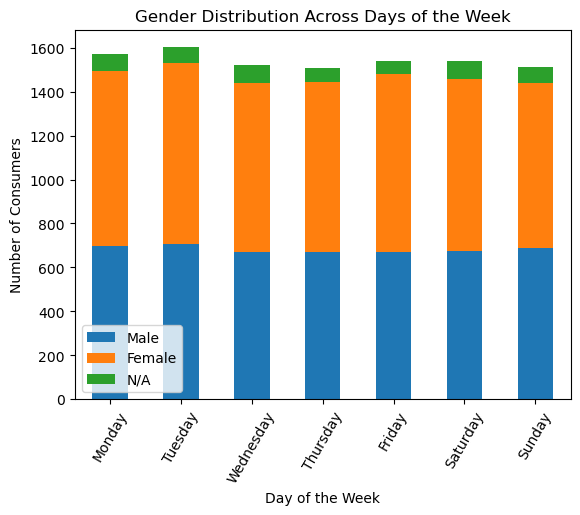

In [9]:

import matplotlib.pyplot as plt
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

merged_df['DayOfWeek'] = pd.Categorical(merged_df['timestamp'].dt.day_name(), categories=day_order, ordered=True)

gender_counts_by_day = merged_df.groupby(['DayOfWeek', 'Gender'])['Gender'].count().unstack()

plt.figure(figsize=(12, 12))
gender_counts_by_day.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Days of the Week')
plt.legend(labels=["Male", "Female", "N/A"], loc="lower left")
plt.ylabel('Number of Consumers')
plt.xlabel('Day of the Week')
plt.xticks(rotation=60)
plt.show()

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

consumer_df = pd.read_csv('consumer_data.csv')
data_df = pd.read_csv('simulated_data.csv')
bar_df = pd.read_csv('bar_data.csv')

merged_df = merged_df.rename(columns={"Zip Code": "user_zip_code"})
bar_df = bar_df.rename(columns={"Zip Code": "bar_zip_code"})
bar_df = bar_df.rename(columns={"Bar ID": "bar_id"})

merged_df2 = pd.merge(merged_df, bar_df, on = 'bar_id')


print(merged_df2)


              Name_x  user_id  Age  Gender  user_zip_code           timestamp  \
0         John Smith        1   27       0           2115 2025-01-09 20:26:18   
1         John Smith        1   27       0           2115 2025-01-05 21:06:07   
2         John Smith        1   27       0           2115 2025-01-01 07:11:07   
3         John Smith        1   27       0           2115 2025-01-01 02:08:31   
4         John Smith        1   27       0           2115 2024-12-28 23:42:01   
...              ...      ...  ...     ...            ...                 ...   
10795  Sophie Fisher      562   54       1           3126 2024-11-01 02:37:37   
10796  Sophie Fisher      562   54       1           3126 2024-10-29 01:11:38   
10797  Sophie Fisher      562   54       1           3126 2024-10-28 07:32:55   
10798  Sophie Fisher      562   54       1           3126 2024-10-27 02:42:12   
10799  Sophie Fisher      562   54       1           3126 2024-10-19 23:01:15   

                name       

In [11]:
zip_count_by_bar = merged_df2.groupby(['bar', 'user_zip_code'])['user_zip_code'].count().unstack()


In [12]:

merged_df2['bar_zip_code_with_name'] = merged_df2['bar'] + " (" + merged_df2['bar_zip_code'].astype(str) + ")"

zip_count_by_bar = merged_df2.groupby(['bar_zip_code_with_name', 'user_zip_code'])['user_zip_code'].count().unstack()

print(zip_count_by_bar)

user_zip_code                    2103  2115  2127  2129  2228  3126
bar_zip_code_with_name                                             
Back Bay Barrel (2127)            151   199   208   174   193   203
Beacon Brews (2127)               145   183   200   138   174   186
Charles River Brew House (2127)   130   195   190   153   216   189
Cobblestone & Co. (2127)          133   176   207   171   203   188
Fenway Tavern (2127)              147   192   221   160   211   169
Harbor & Hops (2127)              146   193   217   150   204   185
Southie Spirits (2127)            138   191   209   148   194   186
The Bostonian Barrel (2127)       161   186   206   163   173   174
The Freedom Taproom (2127)        153   184   205   167   211   193
The Green Line Pub (2127)         144   185   201   151   204   173


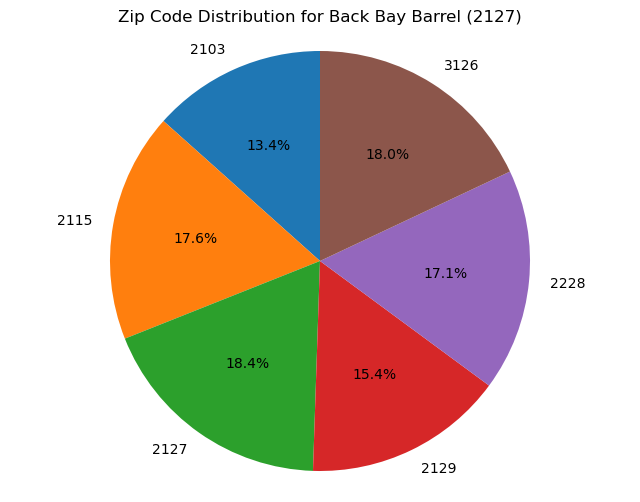

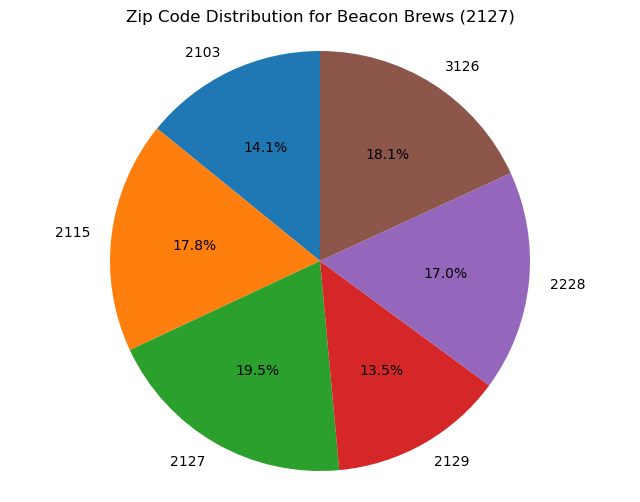

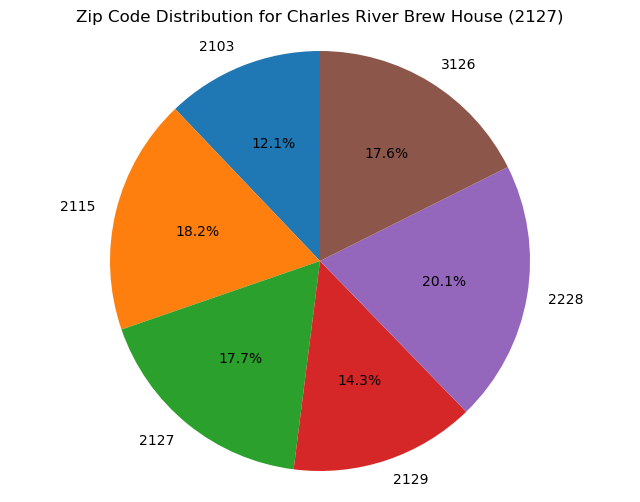

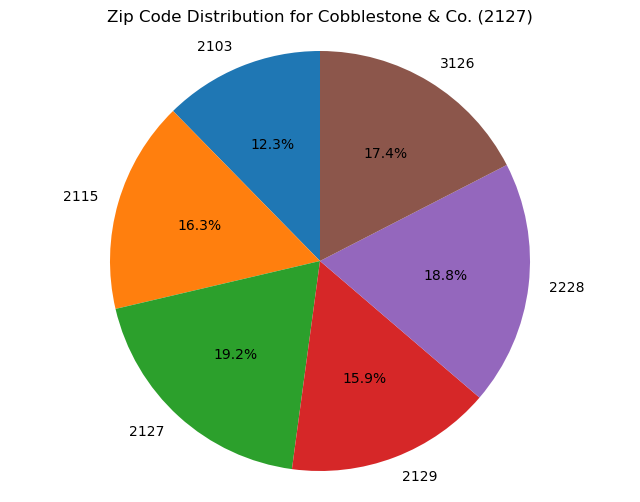

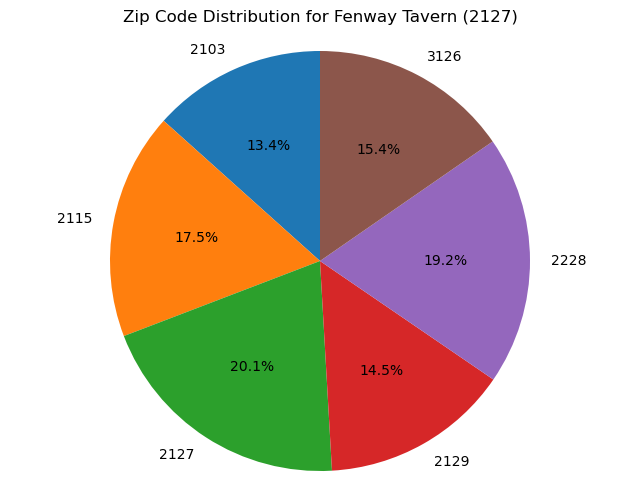

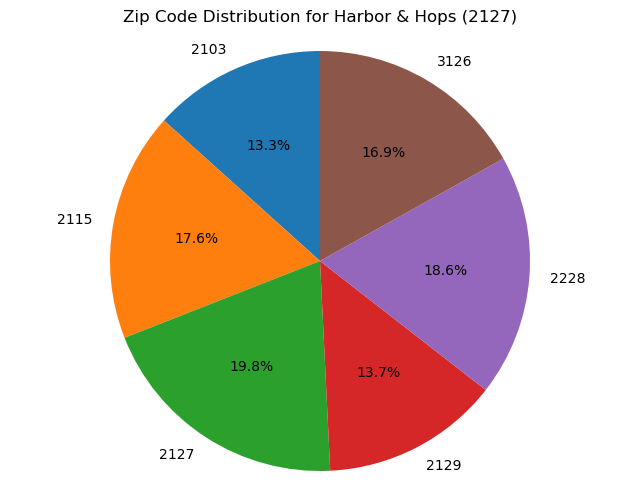

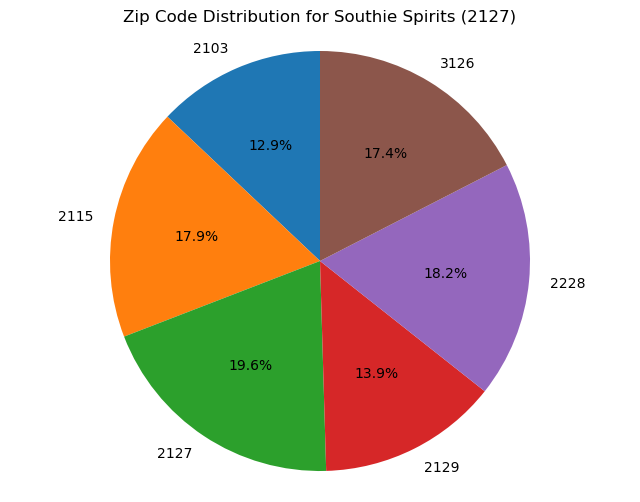

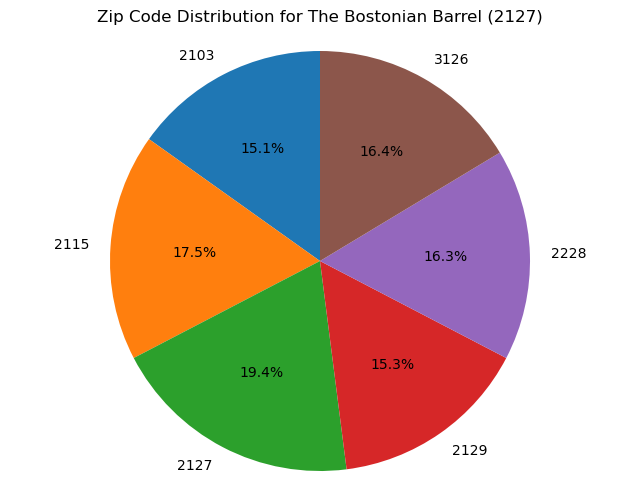

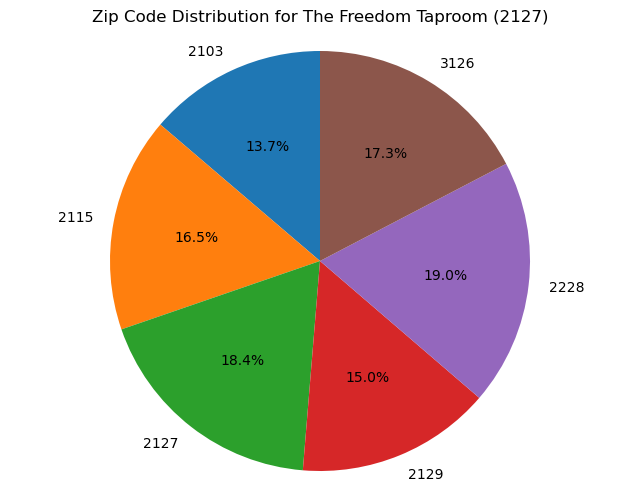

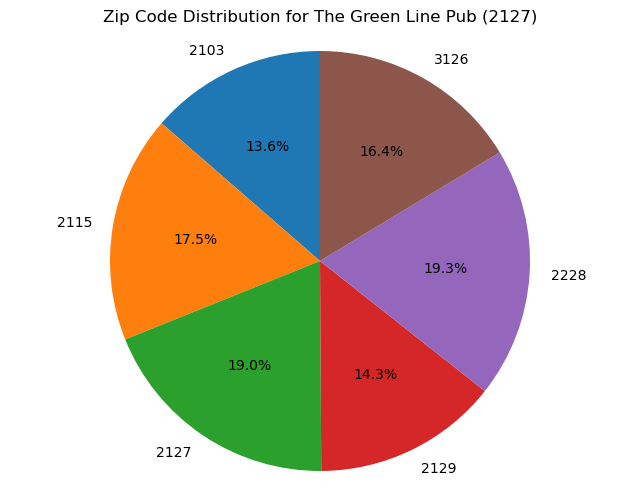

In [13]:


import matplotlib.pyplot as plt


for bar_zip_code_with_name in zip_count_by_bar.index:
    zip_counts = zip_count_by_bar.loc[bar_zip_code_with_name]

    plt.figure(figsize=(8, 6))
    plt.pie(zip_counts, labels=zip_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Zip Code Distribution for {bar_zip_code_with_name}')
    plt.axis('equal')
    plt.show()

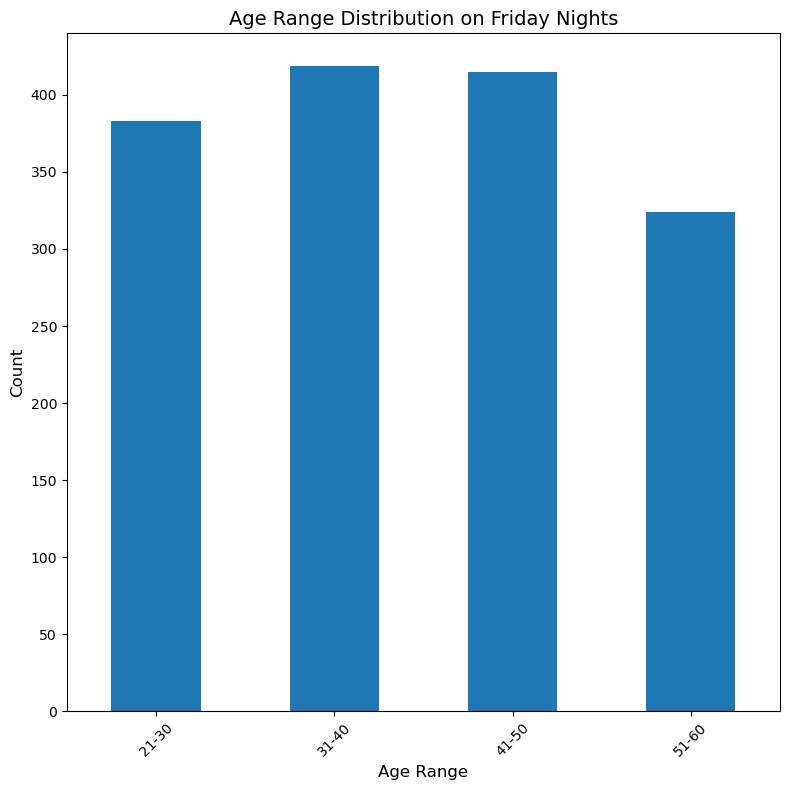

In [14]:
def age_to_range(age):
    if age < 21:
        return 'Under 21'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    elif 61 <= age <= 70:
        return '61-70'
    else:
        return 'Over 70'


merged_df['Age Range'] = merged_df['Age'].apply(age_to_range)



age_range_counts =merged_df['Age Range'].value_counts()


friday_nights = merged_df[(merged_df['DayOfWeek'] == 'Friday')]

age_range_counts_friday_night = friday_nights['Age Range'].value_counts()


plt.figure(figsize=(8, 8))
age_range_counts_friday_night.sort_index().plot(kind='bar')
plt.title('Age Range Distribution on Friday Nights', fontsize=14)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

